In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pickle

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.shape

(2200, 8)

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [11]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [12]:
y.value_counts()

label
rice              100
maize             100
chickpea          100
mothbeans         100
pigeonpeas        100
blackgram         100
mungbean          100
muskmelon         100
apple             100
lentil            100
pomegranate       100
banana            100
mango             100
grapes            100
watermelon        100
coconut           100
cotton            100
orange            100
papaya            100
jute              100
coffee            100
kidneybeans        99
kidneybeansggi      1
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [14]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1279,38,135,203,41.361063,82.797830,6.444373,69.921075
845,24,61,17,22.637142,65.445449,6.233269,38.304111
1483,83,15,49,28.927059,91.393568,6.438008,23.200767
831,3,63,16,24.380419,61.184582,6.868882,53.139467
1734,34,61,49,28.129715,93.321074,6.502675,117.820191
...,...,...,...,...,...,...,...
491,4,69,19,19.251001,47.703518,5.374359,149.063196
1382,101,11,51,25.507370,84.243402,6.792036,44.206900
356,31,79,25,23.188644,22.310455,5.902033,63.382088
812,3,69,23,28.674088,63.188330,7.299361,42.960186


(array([64., 44., 42., 39., 16., 58., 42., 39., 34., 62.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

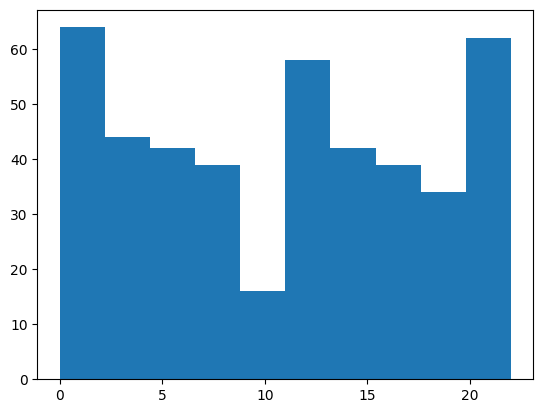

In [23]:
import matplotlib.pyplot as plt
plt.hist(y_test)

array([ 8, 19, 17,  7, 17,  7, 18, 17, 22,  5, 22, 16, 15,  3, 14,  8, 20,
        6, 13, 22,  6,  5,  1, 16, 15, 21, 22,  2, 22, 19, 12, 22,  2, 15,
       20, 11, 19,  7,  4, 20,  9, 13, 17,  9,  1,  3,  2,  2, 20, 19,  7,
       20,  3, 12, 22,  1, 19,  0,  4, 19,  8, 20, 16, 15,  5, 19, 12, 22,
       19,  7,  3, 15, 17,  8,  8,  4, 22,  2, 14, 12, 15,  2,  6,  3, 11,
        2,  7,  4, 22,  3, 15,  9,  3, 21, 21,  2,  2, 21,  0, 18, 20,  5,
        3,  2,  6,  6,  5, 20, 13,  4,  6,  9,  2,  5, 16, 17, 15, 21, 13,
       14, 13,  6, 15, 14, 14, 11, 12,  7, 15,  3, 22,  0, 20,  9,  4,  8,
       21, 18,  1, 13,  8, 14, 21, 17,  4, 15, 22, 16,  5, 21, 19, 12, 15,
        5,  2, 13,  5,  1, 15,  0, 12, 22,  5,  4, 21,  1, 21,  6,  7,  4,
       20, 11, 15,  7,  1,  0,  3, 12, 20, 19,  3,  3,  4,  0, 16,  9,  3,
        8, 14,  5, 20, 12,  0,  4,  0, 20, 19,  5,  8, 11,  3, 15, 22, 20,
       11, 20,  8, 17, 12,  2,  1, 19, 11, 13, 15,  8, 15,  1,  2, 15, 19,
       14,  2, 17, 12, 16

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(1760, 7)

In [18]:
X_test.shape

(440, 7)

In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.990909090909091


In [20]:
import pickle

In [21]:
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0